### Table of Contents

* [1.0 Purpose](#1.0)
    * [1.1 Imports](#1.1)
    * [1.2 Load the data](#1.2)
    * [1.3 Inspect the data](#1.3)
* [2.1 Dummy encoding](#2.1)
    * [2.2 Proportion of classes](#2.2)
    * [2.3 Visualize proportionality](#2.3)
    * [2.4 Heatmap of correlations in our data](#2.4)
    * [2.5 Correlation matricies](#2.5)
    * [2.6 Correlations matrix of targets](#2.6)
    * [2.7 Closer look at data with plots](#2.7)
    * [2.8 Visualize correlations between features that correlate strongly with target NSP class](#2.8)
* [3.1 Export the data](#3.1)
* [4.1 Summary](#4.1)



##### 1.0 Purpose<a id='1.0'></a>

In the previous notebook, we completed data wrangling. The data was narrowed down to pertinent features, missing/extra values were dealt with, and the file was exported locally.

Now, in this notebook, we are in the exploratory data analysis phase of this Capstone 2 project. We will be using data visualization techniques to explore relationships between variables, taking NSP class into consideration.

##### 1.1 Imports<a id='1.1'></a>

In [283]:
# import needed modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [284]:
import pandas as pd
import os
import pickle
    
    
# This utility was created because students were getting confused when they ran 
# their notebooks twice, the previous write-to-file code would do nothing and say  
# nothing. The students thought the file was over-written when in fact, it was not -
# generating hidden bugs in subsequent notebooks.

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
        
        
        
        
        
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)
            import save_file

##### 1.2 Load the data<a id='1.2'></a>

In [285]:
f = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\ctg.csv'
file = pd.read_csv(f)

##### 1.3 Inspect the data<a id='1.3'></a>

In [286]:
file.head()

Unnamed: 0     LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL  ...    Max  \
0           1  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  ...  126.0   
1           2  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  ...  198.0   
2           3  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  ...  198.0   
3           4  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  ...  170.0   
4           5  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  ...  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  NSP  
0   2.0     0.0  120.0  137.0   121.0      73.0       1.0    9.0  2.0  
1   6.0     1.0  141.0  136.0   140.0      12.0       0.0    6.0  1.0  
2   5.0     1.0  141.0  135.0   138.0      13.0       0.0    6.0  1.0  
3  11.0     0.0  137.0  134.0   137.0      13.0       1.0    6.0  1.0  
4   9.0     0.0  137.0  136.0   138.0      11.0       1.0    2.0  1.0  

[5 rows x 24 columns]

In [287]:
# The first column is extraneous, so it gets dropped
file.drop(columns = file.columns[0], axis = 1, inplace= True)
file.shape

(2126, 23)

In [288]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   ASTV      2126 non-null   float64
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   float64
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   float64
 9   DS        2126 non-null   float64
 10  DP        2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Min       2126 non-null   float64
 13  Max       2126 non-null   float64
 14  Nmax      2126 non-null   float64
 15  Nzeros    2126 non-null   float64
 16  Mode      2126 non-null   float64
 17  Mean      2126 non-null   float64
 18  Median    2126 non-null   float64
 19  Variance  2126 non-null   float64
 20  Tendency  2126 non-null   floa

##### 2.1 Dummy encoding<a id='2.1'></a>

In general, categorical features need to be transformed or encoded to be used in some machine learning models, as is the case for Logistic Regression. A common transformation is so-called dummy encoding, where each possible value of a feature becomes a new column, and a 1 is placed in that column if the data instance (a row of the data) contained that value, and a 0 is placed in that column otherwise. 

In [289]:
categorical_features = ['CLASS','NSP']
file_cat = pd.get_dummies(file, columns = categorical_features)
print('The data have ', file_cat.shape[0], ' rows and ', file_cat.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(file_cat.columns)))

The data have  2126  rows and  34  columns

column names: 

LB
AC
FM
UC
ASTV
MSTV
ALTV
MLTV
DL
DS
DP
Width
Min
Max
Nmax
Nzeros
Mode
Mean
Median
Variance
Tendency
CLASS_1.0
CLASS_2.0
CLASS_3.0
CLASS_4.0
CLASS_5.0
CLASS_6.0
CLASS_7.0
CLASS_8.0
CLASS_9.0
CLASS_10.0
NSP_1.0
NSP_2.0
NSP_3.0


In [290]:
file_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LB          2126 non-null   float64
 1   AC          2126 non-null   float64
 2   FM          2126 non-null   float64
 3   UC          2126 non-null   float64
 4   ASTV        2126 non-null   float64
 5   MSTV        2126 non-null   float64
 6   ALTV        2126 non-null   float64
 7   MLTV        2126 non-null   float64
 8   DL          2126 non-null   float64
 9   DS          2126 non-null   float64
 10  DP          2126 non-null   float64
 11  Width       2126 non-null   float64
 12  Min         2126 non-null   float64
 13  Max         2126 non-null   float64
 14  Nmax        2126 non-null   float64
 15  Nzeros      2126 non-null   float64
 16  Mode        2126 non-null   float64
 17  Mean        2126 non-null   float64
 18  Median      2126 non-null   float64
 19  Variance    2126 non-null  

##### 2.2 Proportion of classes<a id='2.2'></a>


When building classification models, it is always a good idea to know right away the number of samples per class, proportionally to the total number of samples. First we get the counts of each class.


In [291]:
class_counts_nsp = file['NSP'].value_counts()
class_counts_nsp

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

In [292]:
class_counts_class = file['CLASS'].value_counts()
class_counts_class

2.0     579
1.0     384
6.0     332
7.0     252
10.0    197
8.0     107
4.0      81
5.0      72
9.0      69
3.0      53
Name: CLASS, dtype: int64

We compute the relative frequencies (percentages) to better quantify differences in the incidences of the classes:

In [293]:
class_p_nsp = pd.Series([(x / file.shape[0]) * 100.00 for x in class_counts_nsp])
class_p_nsp

0    77.845720
1    13.875823
2     8.278457
dtype: float64

In [294]:
class_p_class = pd.Series([(x / file.shape[0]) * 100.00 for x in class_counts_class])
class_p_class

0    27.234243
1    18.062088
2    15.616181
3    11.853246
4     9.266228
5     5.032926
6     3.809972
7     3.386642
8     3.245532
9     2.492944
dtype: float64

##### 2.3 Visualize proportionality<a id='2.3'></a>

Now we can use the percentages as labels and plot the distribution of the three NSP classes and ten CLASS classes:

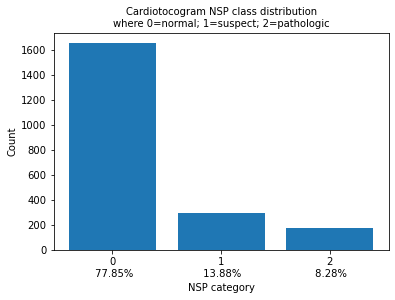

In [295]:
fig, ax = plt.subplots()
ax.bar(class_counts_nsp.index, class_counts_nsp)
ax.set_xticks([1,2,3])
ax.set_xticklabels(class_p_nsp.index.astype(str) + '\n' + ' ' +
                   class_p_nsp.round(2).astype(str) + '%')

ax.set_ylabel('Count')
ax.set_xlabel('NSP category')
ax.set_title('Cardiotocogram NSP class distribution\nwhere 0=normal; 1=suspect; 2=pathologic',
              fontsize = 10)
plt.show()

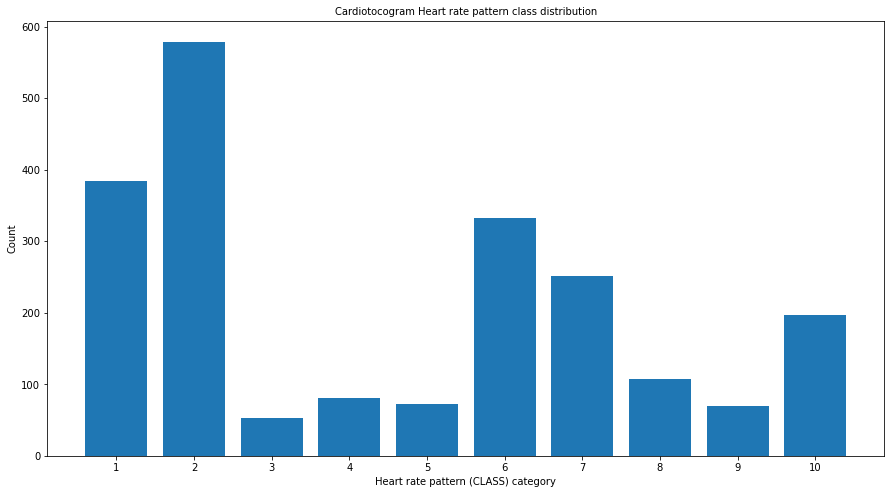

In [296]:
fig, ax = plt.subplots()
ax.bar(class_counts_class.index, class_counts_class)
x = [1,2,3,4,5,6,7,8,9,10]

ax.set_xticks(x)

fig.set_size_inches(15,8)
ax.set_ylabel('Count')
ax.set_xlabel('Heart rate pattern (CLASS) category')
ax.set_title('Cardiotocogram Heart rate pattern class distribution',
              fontsize = 10)
plt.show()

This data presents us with an Imbalanced Multi-Class Classification Problem -- IMCP

##### 2.4 Heatmap of correlations in our data<a id='2.4'></a>

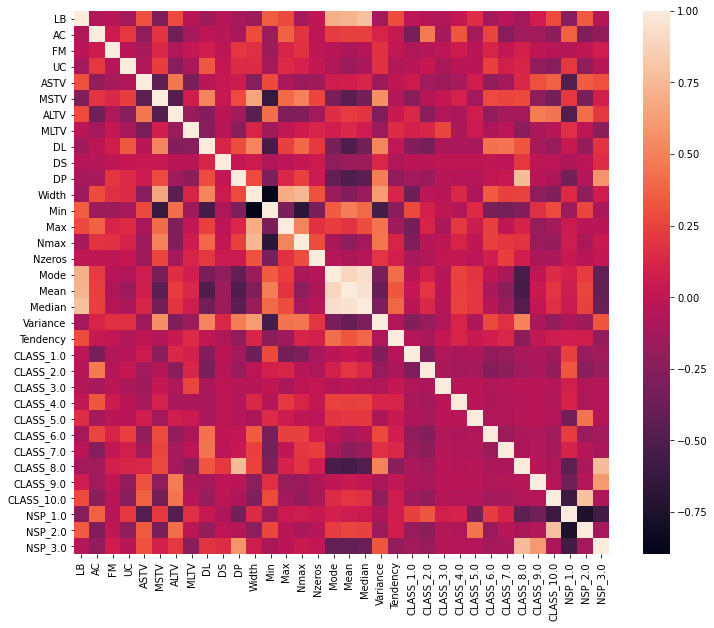

In [297]:

plt.subplots(figsize=(12,10))
sns.heatmap(file_cat.corr());

It appears that NSP_3.0 (Pathological diagnosis) correlates highly positively with features 'DP', 'Variance', and 'ASTV', and highly negatively with features 'Mode', 'Mean', 'Median', 'AC', and 'Tendancy'.

NSP_2.0 (Suspected pathology) correlates highly positively with features 'ASTV', 'ALTV', and 'LB', and highly negatively correlates with 'AC', 'UC', 'MSTV', 'DL', 'Width', and 'Variance'.

NSP_1.0 (Normal pathology) correlates highly positively with features 'AC', 'UC', and 'Width', and highly negatively correlates with 'ALTV', 'ASTV', 'LB', 'DP', and 'Min'.

View actual correlation values instead of heatmap

##### 2.5 Correlation matricies<a id='2.5'></a>

In [298]:
matrix = file_cat.corr()

In [299]:
matrix

LB        AC        FM        UC      ASTV      MSTV  \
LB          1.000000 -0.077967 -0.033305 -0.127722  0.305570 -0.279607   
AC         -0.077967  1.000000  0.053956  0.212100 -0.197985  0.191378   
FM         -0.033305  0.053956  1.000000 -0.036626 -0.116461  0.138061   
UC         -0.127722  0.212100 -0.036626  1.000000 -0.079651  0.232687   
ASTV        0.305570 -0.197985 -0.116461 -0.079651  1.000000 -0.430705   
MSTV       -0.279607  0.191378  0.138061  0.232687 -0.430705  1.000000   
ALTV        0.285630 -0.345162 -0.072214 -0.247513  0.459413 -0.470259   
MLTV       -0.032091 -0.128901  0.021031 -0.106590 -0.315105  0.073892   
DL         -0.155908 -0.011350  0.076283  0.339484 -0.037040  0.516901   
DS         -0.053518 -0.039341 -0.010328  0.018405  0.033949  0.034130   
DP         -0.117133 -0.110317  0.205337  0.152395  0.053677  0.287548   
Width      -0.147679  0.291516  0.171448  0.152990 -0.260463  0.660847   
Min         0.361619 -0.157447 -0.158422 -0.112597  0.275378 -0.622569   
Max         0.275110  0.373493  0.111228  0.146645 -0.111806  0.409072   
Nmax       -0.113933  0.191475  0.183904  0.095512 -0.167561  0.501430   
Nzeros     -0.004745 -0.011430 -0.014632  0.022701 -0.149296  0.266183   
Mode        0.708993  0.221693 -0.037492 -0.077695  0.058363 -0.307586   
Mean        0.723121  0.236811 -0.085718 -0.169739  0.074554 -0.445401   
Median      0.789246  0.250729 -0.056281 -0.111041  0.119960 -0.336109   
Variance   -0.133938  0.111981  0.177793  0.184188 -0.146434  0.555852   
Tendency    0.293503  0.032235 -0.000069 -0.060995 -0.005748 -0.066140   
CLASS_1.0  -0.023075 -0.315433 -0.077368 -0.042272  0.046221 -0.242157   
CLASS_2.0  -0.048750  0.467663 -0.053710  0.023350 -0.139987 -0.045688   
CLASS_3.0  -0.062894 -0.113805 -0.022823 -0.097485 -0.142252  0.021396   
CLASS_4.0   0.005591  0.328854  0.058019 -0.029741 -0.113669  0.096120   
CLASS_5.0   0.158350 -0.116153 -0.024547 -0.026050  0.072269 -0.126216   
CLASS_6.0  -0.130368  0.264657  0.113454  0.243954 -0.198840  0.284401   
CLASS_7.0  -0.030849 -0.255090  0.001145  0.084710 -0.132195  0.259776   
CLASS_8.0  -0.122136 -0.140998  0.089162  0.113672  0.137192  0.275303   
CLASS_9.0   0.069885 -0.140062 -0.003765 -0.205653  0.308643 -0.210904   
CLASS_10.0  0.283783 -0.238009 -0.033851 -0.251330  0.364282 -0.329125   
NSP_1.0    -0.251875  0.369470 -0.043953  0.213611 -0.493391  0.207717   
NSP_2.0     0.341922 -0.282880 -0.001656 -0.223081  0.348213 -0.315373   
NSP_3.0    -0.049357 -0.201938  0.068319 -0.042066  0.306735  0.082600   

                ALTV      MLTV        DL        DS  ...  CLASS_4.0  CLASS_5.0  \
LB          0.285630 -0.032091 -0.155908 -0.053518  ...   0.005591   0.158350   
AC         -0.345162 -0.128901 -0.011350 -0.039341  ...   0.328854  -0.116153   
FM         -0.072214  0.021031  0.076283 -0.010328  ...   0.058019  -0.024547   
UC         -0.247513 -0.106590  0.339484  0.018405  ...  -0.029741  -0.026050   
ASTV        0.459413 -0.315105 -0.037040  0.033949  ...  -0.113669   0.072269   
MSTV       -0.470259  0.073892  0.516901  0.034130  ...   0.096120  -0.126216   
ALTV        1.000000 -0.171114 -0.266298 -0.030770  ...  -0.106547   0.075927   
MLTV       -0.171114  1.000000 -0.251442 -0.037667  ...  -0.094099   0.045238   
DL         -0.266298 -0.251442  1.000000  0.121617  ...  -0.112276  -0.108282   
DS         -0.030770 -0.037667  0.121617  1.000000  ...  -0.011439  -0.010761   
DP         -0.140133 -0.230849  0.294068  0.019766  ...  -0.054040  -0.050837   
Width      -0.451297  0.110942  0.520656  0.044880  ...   0.139542  -0.083934   
Min         0.422834 -0.144976 -0.539125 -0.071974  ...  -0.056696   0.145822   
Max        -0.283183  0.002023  0.242187 -0.021135  ...   0.209539   0.058004   
Nmax       -0.279301  0.056357  0.393860  0.007024  ...   0.116220  -0.001685   
Nzeros     -0.121784  0.123869  0.208487  0.043441  ...   0.009702  -0.023208   
Mode        0.165211  0.072071 -0.315463 -0.215161

We need to pair down the size of this correlation matrix and make it easier to use. We can make a dataframe for each pair, with their respective correlation values

In [300]:
matrix_table = matrix.stack().reset_index()

Then eliminate the needless self-referential correlations, (e.g. LB,LB = 1.00)

In [301]:
matrix_table_clean = matrix_table[matrix_table['level_0']!=matrix_table['level_1']]

In [302]:
matrix_table_clean

level_0     level_1         0
1          LB          AC -0.077967
2          LB          FM -0.033305
3          LB          UC -0.127722
4          LB        ASTV  0.305570
5          LB        MSTV -0.279607
...       ...         ...       ...
1150  NSP_3.0   CLASS_8.0  0.766275
1151  NSP_3.0   CLASS_9.0  0.600000
1152  NSP_3.0  CLASS_10.0 -0.090121
1153  NSP_3.0     NSP_1.0 -0.563155
1154  NSP_3.0     NSP_2.0 -0.120588

[1122 rows x 3 columns]

Rename the columns to suit our use

In [303]:
mtc = matrix_table_clean.rename(columns={'level_0':'var_1','level_1':'var_2',0:'correlation'})

In [304]:
mtc

var_1       var_2  correlation
1          LB          AC    -0.077967
2          LB          FM    -0.033305
3          LB          UC    -0.127722
4          LB        ASTV     0.305570
5          LB        MSTV    -0.279607
...       ...         ...          ...
1150  NSP_3.0   CLASS_8.0     0.766275
1151  NSP_3.0   CLASS_9.0     0.600000
1152  NSP_3.0  CLASS_10.0    -0.090121
1153  NSP_3.0     NSP_1.0    -0.563155
1154  NSP_3.0     NSP_2.0    -0.120588

[1122 rows x 3 columns]

In [305]:
mtc_s = mtc.sort_values('correlation')

In [306]:
mtc_s

var_1    var_2  correlation
419       Min    Width    -0.898519
386     Width      Min    -0.898519
1086  NSP_1.0  NSP_2.0    -0.752411
1119  NSP_2.0  NSP_1.0    -0.752411
422       Min     Nmax    -0.670287
...       ...      ...          ...
594      Mean     Mode     0.893412
562      Mode   Median     0.933399
628    Median     Mode     0.933399
629    Median     Mean     0.948251
596      Mean   Median     0.948251

[1122 rows x 3 columns]

Remove duplicate pairs with lambda function

In [307]:
mtc_s['ordered-cols'] = mtc_s.apply(lambda x: '-'.join(sorted([x['var_1'],x['var_2']])),axis=1)
mtc_s = mtc_s.drop_duplicates(['ordered-cols'])
mtc_s.drop(['ordered-cols'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [308]:
mtc_s

var_1       var_2  correlation
419          Min       Width    -0.898519
1086     NSP_1.0     NSP_2.0    -0.752411
422          Min        Nmax    -0.670287
413          Min        MSTV    -0.622569
1084     NSP_1.0  CLASS_10.0    -0.599040
...          ...         ...          ...
18            LB      Median     0.789246
1052  CLASS_10.0     NSP_2.0     0.791467
561         Mode        Mean     0.893412
562         Mode      Median     0.933399
629       Median        Mean     0.948251

[561 rows x 3 columns]

Add an absolute value of the correlation coefficient column.  
Eliminate the target variables to focus on just the features.

In [309]:
mtc_s['abs_corr'] = abs(mtc_s['correlation'])
f = file.iloc[:, 0:21]
mtc_filtered = mtc_s['var_1'].isin(f)

mtc_filtered2 = mtc_s['var_2'].isin(f)

<ipython-input-309-5203e072d6f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mtc_s['abs_corr'] = abs(mtc_s['correlation'])


In [310]:
mtc2 = mtc_s[mtc_filtered & mtc_filtered2]

In [311]:
mtc2

var_1     var_2  correlation  abs_corr
419     Min     Width    -0.898519  0.898519
422     Min      Nmax    -0.670287  0.670287
413     Min      MSTV    -0.622569  0.622569
427     Min  Variance    -0.545091  0.545091
416     Min        DL    -0.539125  0.539125
..      ...       ...          ...       ...
388   Width      Nmax     0.747071  0.747071
18       LB    Median     0.789246  0.789246
561    Mode      Mean     0.893412  0.893412
562    Mode    Median     0.933399  0.933399
629  Median      Mean     0.948251  0.948251

[210 rows x 4 columns]

Sort dataframe by correlation

In [312]:
mtc_sort = mtc2.sort_values('correlation')

In [313]:
mtc_sort

var_1     var_2  correlation  abs_corr
419     Min     Width    -0.898519  0.898519
422     Min      Nmax    -0.670287  0.670287
413     Min      MSTV    -0.622569  0.622569
427     Min  Variance    -0.545091  0.545091
416     Min        DL    -0.539125  0.539125
..      ...       ...          ...       ...
388   Width      Nmax     0.747071  0.747071
18       LB    Median     0.789246  0.789246
561    Mode      Mean     0.893412  0.893412
562    Mode    Median     0.933399  0.933399
629  Median      Mean     0.948251  0.948251

[210 rows x 4 columns]

Sort new dataframe by the absolute value of the correlation

In [314]:
mtc_sort_corr = mtc2.sort_values('abs_corr',ascending=False)

In [315]:
mtc_sort_corr

var_1     var_2  correlation  abs_corr
629    Median      Mean     0.948251  0.948251
562      Mode    Median     0.933399  0.933399
419       Min     Width    -0.898519  0.898519
561      Mode      Mean     0.893412  0.893412
18         LB    Median     0.789246  0.789246
..        ...       ...          ...       ...
156      ASTV  Tendency    -0.005748  0.005748
510    Nzeros        LB    -0.004745  0.004745
449       Max      MLTV     0.002023  0.002023
688  Tendency        DL    -0.000687  0.000687
682  Tendency        FM    -0.000069  0.000069

[210 rows x 4 columns]

Subset dataframe for high absolute correlation values

In [316]:
matrix_HIGH = mtc_sort_corr[mtc_sort_corr['abs_corr']>=0.7]
matrix_HIGH['corr_level']="HIGH"

<ipython-input-316-e990ad75196e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_HIGH['corr_level']="HIGH"


In [317]:
matrix_HIGH

var_1   var_2  correlation  abs_corr corr_level
629  Median    Mean     0.948251  0.948251       HIGH
562    Mode  Median     0.933399  0.933399       HIGH
419     Min   Width    -0.898519  0.898519       HIGH
561    Mode    Mean     0.893412  0.893412       HIGH
18       LB  Median     0.789246  0.789246       HIGH
388   Width    Nmax     0.747071  0.747071       HIGH
578    Mean      LB     0.723121  0.723121       HIGH
544    Mode      LB     0.708993  0.708993       HIGH

Subset dataframe for medium absolute correlation values

In [318]:
matrix_MID = mtc_sort_corr[(mtc_sort_corr['abs_corr']<0.7) & (mtc_sort_corr['abs_corr']>=0.5)]
matrix_MID['corr_level']="MID"

<ipython-input-318-57d3ca00f49f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_MID['corr_level']="MID"


In [319]:
matrix_MID

var_1     var_2  correlation  abs_corr corr_level
453       Max     Width     0.690769  0.690769        MID
422       Min      Nmax    -0.670287  0.670287        MID
379     Width      MSTV     0.660847  0.660847        MID
413       Min      MSTV    -0.622569  0.622569        MID
657  Variance     Width     0.615884  0.615884        MID
651  Variance      MSTV     0.555852  0.555852        MID
427       Min  Variance    -0.545091  0.545091        MID
416       Min        DL    -0.539125  0.539125        MID
382     Width        DL     0.520656  0.520656        MID
456       Max      Nmax     0.517652  0.517652        MID
178      MSTV        DL     0.516901  0.516901        MID
291        DL  Variance     0.515130  0.515130        MID
588      Mean        DP    -0.511503  0.511503        MID
586      Mean        DL    -0.509446  0.509446        MID
184      MSTV      Nmax     0.501430  0.501430        MID

Subset dataframe for low absolute correlation values

In [320]:
matrix_LOW = mtc_sort_corr[mtc_sort_corr['abs_corr']<0.5]
matrix_LOW['corr_level']="LOW"

<ipython-input-320-f5b677a24486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_LOW['corr_level']="LOW"


In [321]:
matrix_LOW

var_1     var_2  correlation  abs_corr corr_level
359        DP  Variance     0.487212  0.487212        LOW
590      Mean       Min     0.486121  0.486121        LOW
176      MSTV      ALTV    -0.470259  0.470259        LOW
142      ASTV      ALTV     0.459413  0.459413        LOW
660  Variance      Nmax     0.454354  0.454354        LOW
..        ...       ...          ...       ...        ...
156      ASTV  Tendency    -0.005748  0.005748        LOW
510    Nzeros        LB    -0.004745  0.004745        LOW
449       Max      MLTV     0.002023  0.002023        LOW
688  Tendency        DL    -0.000687  0.000687        LOW
682  Tendency        FM    -0.000069  0.000069        LOW

[187 rows x 5 columns]

Recombine the 3 dataframes into one again, with proper labels attached (HIGH, MID, LOW)

In [322]:
mtc_sort_corr = pd.concat([matrix_HIGH , matrix_MID , matrix_LOW], axis=0)

In [323]:
mtc_sort_corr.head(30)

var_1     var_2  correlation  abs_corr corr_level
629    Median      Mean     0.948251  0.948251       HIGH
562      Mode    Median     0.933399  0.933399       HIGH
419       Min     Width    -0.898519  0.898519       HIGH
561      Mode      Mean     0.893412  0.893412       HIGH
18         LB    Median     0.789246  0.789246       HIGH
388     Width      Nmax     0.747071  0.747071       HIGH
578      Mean        LB     0.723121  0.723121       HIGH
544      Mode        LB     0.708993  0.708993       HIGH
453       Max     Width     0.690769  0.690769        MID
422       Min      Nmax    -0.670287  0.670287        MID
379     Width      MSTV     0.660847  0.660847        MID
413       Min      MSTV    -0.622569  0.622569        MID
657  Variance     Width     0.615884  0.615884        MID
651  Variance      MSTV     0.555852  0.555852        MID
427       Min  Variance    -0.545091  0.545091        MID
416       Min        DL    -0.539125  0.539125        MID
382     Width        DL     0.520656  0.520656        MID
456       Max      Nmax     0.517652  0.517652        MID
178      MSTV        DL     0.516901  0.516901        MID
291        DL  Variance     0.515130  0.515130        MID
588      Mean        DP    -0.511503  0.511503        MID
586      Mean        DL    -0.509446  0.509446        MID
184      MSTV      Nmax     0.501430  0.501430        MID
359        DP  Variance     0.487212  0.487212        LOW
590      Mean       Min     0.486121  0.486121        LOW
176      MSTV      ALTV    -0.470259  0.470259        LOW
142      ASTV      ALTV     0.459413  0.459413        LOW
660  Variance      Nmax     0.454354  0.454354        LOW
215      ALTV     Width    -0.451297  0.451297        LOW
358        DP    Median    -0.445473  0.445473        LOW

In [324]:
mtc_sort_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 629 to 682
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   var_1        210 non-null    object 
 1   var_2        210 non-null    object 
 2   correlation  210 non-null    float64
 3   abs_corr     210 non-null    float64
 4   corr_level   210 non-null    object 
dtypes: float64(2), object(3)
memory usage: 9.8+ KB


##### 2.6 Correlation matrix for targets<a id='2.6'></a>

Same process, but to get the correlations between features and targets

In [325]:
mtc_s

var_1       var_2  correlation  abs_corr
419          Min       Width    -0.898519  0.898519
1086     NSP_1.0     NSP_2.0    -0.752411  0.752411
422          Min        Nmax    -0.670287  0.670287
413          Min        MSTV    -0.622569  0.622569
1084     NSP_1.0  CLASS_10.0    -0.599040  0.599040
...          ...         ...          ...       ...
18            LB      Median     0.789246  0.789246
1052  CLASS_10.0     NSP_2.0     0.791467  0.791467
561         Mode        Mean     0.893412  0.893412
562         Mode      Median     0.933399  0.933399
629       Median        Mean     0.948251  0.948251

[561 rows x 4 columns]

In [326]:
f2 = ['NSP_1.0','NSP_2.0','NSP_3.0']
mtc_filtered3 = mtc_s['var_1'].isin(f2)

mtc_filtered4 = mtc_s['var_2'].isin(f2)

NSP_c = mtc_s[mtc_filtered4 | mtc_filtered3]
NSP_c

var_1       var_2  correlation  abs_corr
1086     NSP_1.0     NSP_2.0    -0.752411  0.752411
1084     NSP_1.0  CLASS_10.0    -0.599040  0.599040
1153     NSP_3.0     NSP_1.0    -0.563155  0.563155
167         ASTV     NSP_1.0    -0.493391  0.493391
235         ALTV     NSP_1.0    -0.489400  0.489400
...          ...         ...          ...       ...
1113     NSP_2.0   CLASS_5.0     0.443877  0.443877
373           DP     NSP_3.0     0.580253  0.580253
1019   CLASS_9.0     NSP_3.0     0.600000  0.600000
985    CLASS_8.0     NSP_3.0     0.766275  0.766275
1052  CLASS_10.0     NSP_2.0     0.791467  0.791467

[96 rows x 4 columns]

Remove CLASS class

In [327]:
noC = file_cat.columns[list(range(21,31))]
noC

Index(['CLASS_1.0', 'CLASS_2.0', 'CLASS_3.0', 'CLASS_4.0', 'CLASS_5.0',
       'CLASS_6.0', 'CLASS_7.0', 'CLASS_8.0', 'CLASS_9.0', 'CLASS_10.0'],
      dtype='object')

In [328]:
mtc_filtered5 = ~mtc_s['var_1'].isin(noC)
mtc_filtered6 = ~mtc_s['var_2'].isin(noC)
NSP_c2 = NSP_c[mtc_filtered6 & mtc_filtered5]
NSP_c2

<ipython-input-328-18d7f33698f7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NSP_c2 = NSP_c[mtc_filtered6 & mtc_filtered5]


var_1    var_2  correlation  abs_corr
1086  NSP_1.0  NSP_2.0    -0.752411  0.752411
1153  NSP_3.0  NSP_1.0    -0.563155  0.563155
167      ASTV  NSP_1.0    -0.493391  0.493391
235      ALTV  NSP_1.0    -0.489400  0.489400
1138  NSP_3.0     Mode    -0.419051  0.419051
...       ...      ...          ...       ...
32         LB  NSP_2.0     0.341922  0.341922
1092  NSP_2.0     ASTV     0.348213  0.348213
65         AC  NSP_1.0     0.369470  0.369470
236      ALTV  NSP_2.0     0.418659  0.418659
373        DP  NSP_3.0     0.580253  0.580253

[66 rows x 4 columns]

Remove rows with multiple targets

In [329]:
NSP_c2e = NSP_c2[~(NSP_c2["var_1"].str.contains("NSP") & NSP_c2["var_2"].str.contains("NSP"))]
NSP_c2e

var_1    var_2  correlation  abs_corr
167      ASTV  NSP_1.0    -0.493391  0.493391
235      ALTV  NSP_1.0    -0.489400  0.489400
1138  NSP_3.0     Mode    -0.419051  0.419051
1139  NSP_3.0     Mean    -0.416886  0.416886
645    Median  NSP_3.0    -0.384857  0.384857
...       ...      ...          ...       ...
32         LB  NSP_2.0     0.341922  0.341922
1092  NSP_2.0     ASTV     0.348213  0.348213
65         AC  NSP_1.0     0.369470  0.369470
236      ALTV  NSP_2.0     0.418659  0.418659
373        DP  NSP_3.0     0.580253  0.580253

[63 rows x 4 columns]

Sort rows by the absolute value of the correlation

In [330]:
NSP_sc = NSP_c2e.sort_values('abs_corr',ascending=False)
NSP_sc

var_1    var_2  correlation  abs_corr
373        DP  NSP_3.0     0.580253  0.580253
167      ASTV  NSP_1.0    -0.493391  0.493391
235      ALTV  NSP_1.0    -0.489400  0.489400
1138  NSP_3.0     Mode    -0.419051  0.419051
236      ALTV  NSP_2.0     0.418659  0.418659
...       ...      ...          ...       ...
475       Max  NSP_3.0    -0.028399  0.028399
338        DS  NSP_2.0    -0.023070  0.023070
270      MLTV  NSP_2.0    -0.011522  0.011522
1137  NSP_3.0   Nzeros     0.009780  0.009780
100        FM  NSP_2.0    -0.001656  0.001656

[63 rows x 4 columns]

Label each correlation with its strength (HIGH, MID, LOW)

In [331]:
matrix_HIGH2 = NSP_sc[NSP_sc['abs_corr']>=0.7]
matrix_HIGH2['corr_level']="HIGH"
matrix_MID2 = NSP_sc[(NSP_sc['abs_corr']<0.7) & (NSP_sc['abs_corr']>=0.5)]
matrix_MID2['corr_level']="MID"
matrix_LOW2 = NSP_sc[NSP_sc['abs_corr']<0.5]
matrix_LOW2['corr_level']="LOW"
mtc_sort_corr2 = pd.concat([matrix_HIGH2 , matrix_MID2 , matrix_LOW2], axis=0)

<ipython-input-331-9cc40c0572e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_MID2['corr_level']="MID"
<ipython-input-331-9cc40c0572e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matrix_LOW2['corr_level']="LOW"


In [332]:
mtc_sort_corr2

var_1    var_2  correlation  abs_corr corr_level
373        DP  NSP_3.0     0.580253  0.580253        MID
167      ASTV  NSP_1.0    -0.493391  0.493391        LOW
235      ALTV  NSP_1.0    -0.489400  0.489400        LOW
1138  NSP_3.0     Mode    -0.419051  0.419051        LOW
236      ALTV  NSP_2.0     0.418659  0.418659        LOW
...       ...      ...          ...       ...        ...
475       Max  NSP_3.0    -0.028399  0.028399        LOW
338        DS  NSP_2.0    -0.023070  0.023070        LOW
270      MLTV  NSP_2.0    -0.011522  0.011522        LOW
1137  NSP_3.0   Nzeros     0.009780  0.009780        LOW
100        FM  NSP_2.0    -0.001656  0.001656        LOW

[63 rows x 5 columns]

Observation: The three NSP categorical targets have no 'HIGH' correlations, and only one 'MID' correlation (DP - NSP_3.0).

##### 2.7 Closer look at data with plots<a id='2.7'></a>

Boxplots

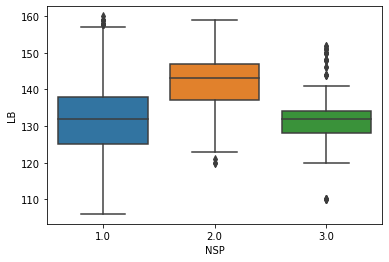

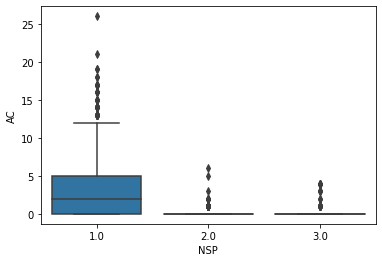

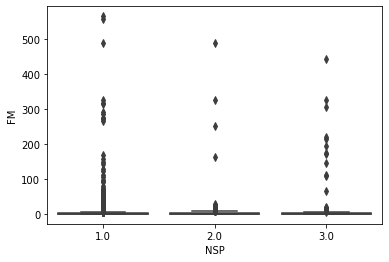

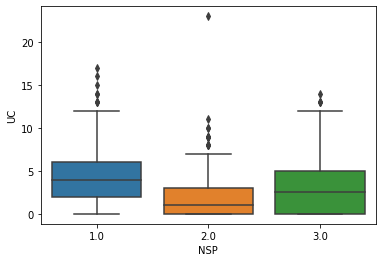

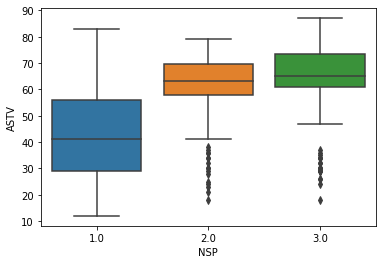

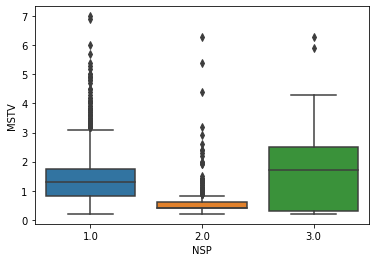

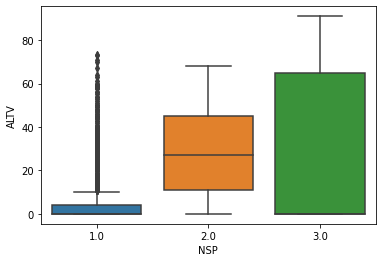

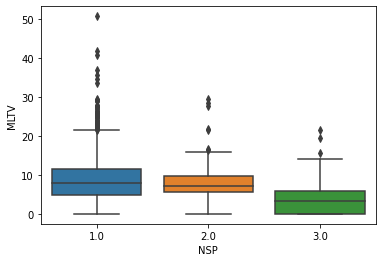

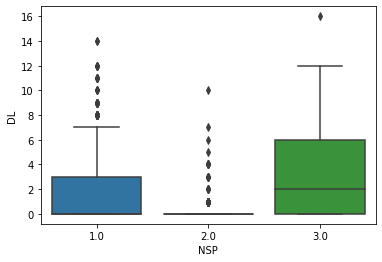

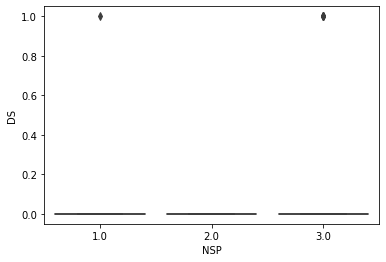

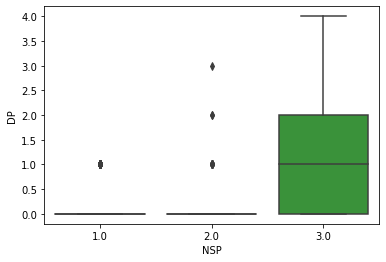

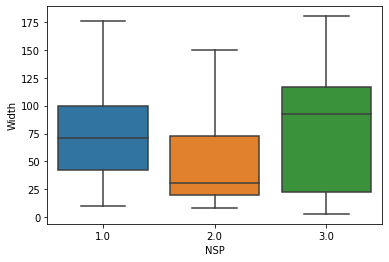

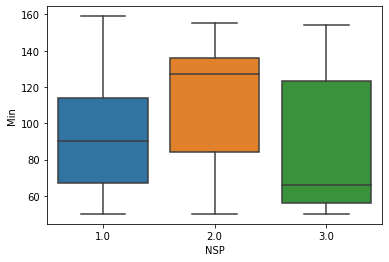

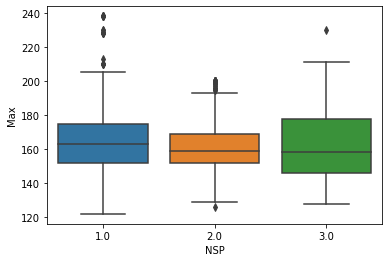

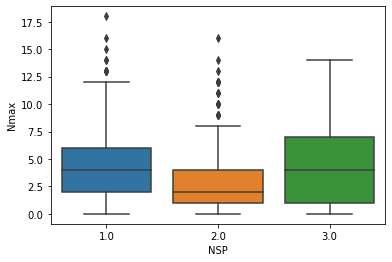

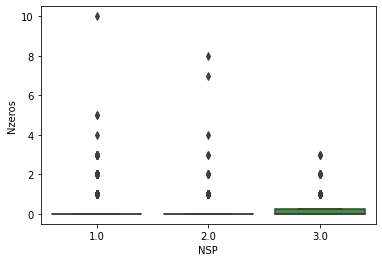

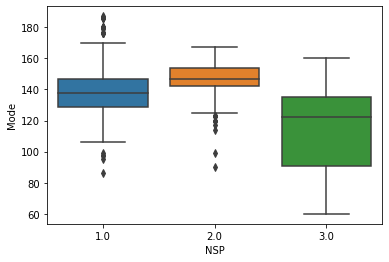

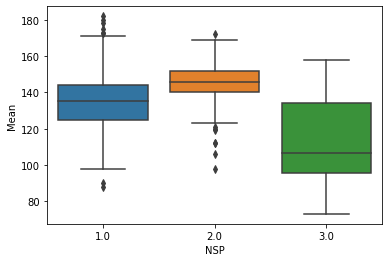

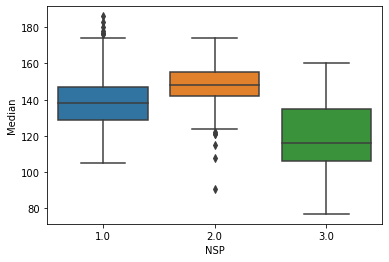

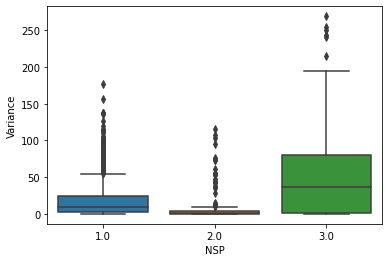

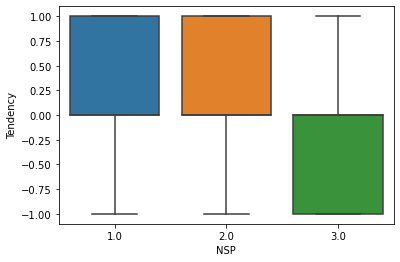

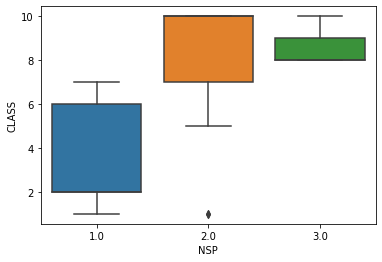

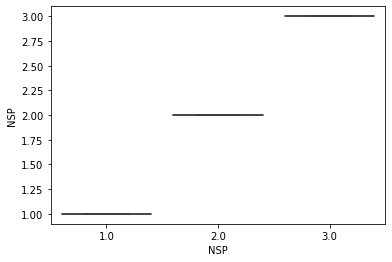

In [333]:

for i in file.columns:
    
    sns.boxplot(data=file, x='NSP', y=i)
    plt.show()
    

Alternate boxplot view - subplots

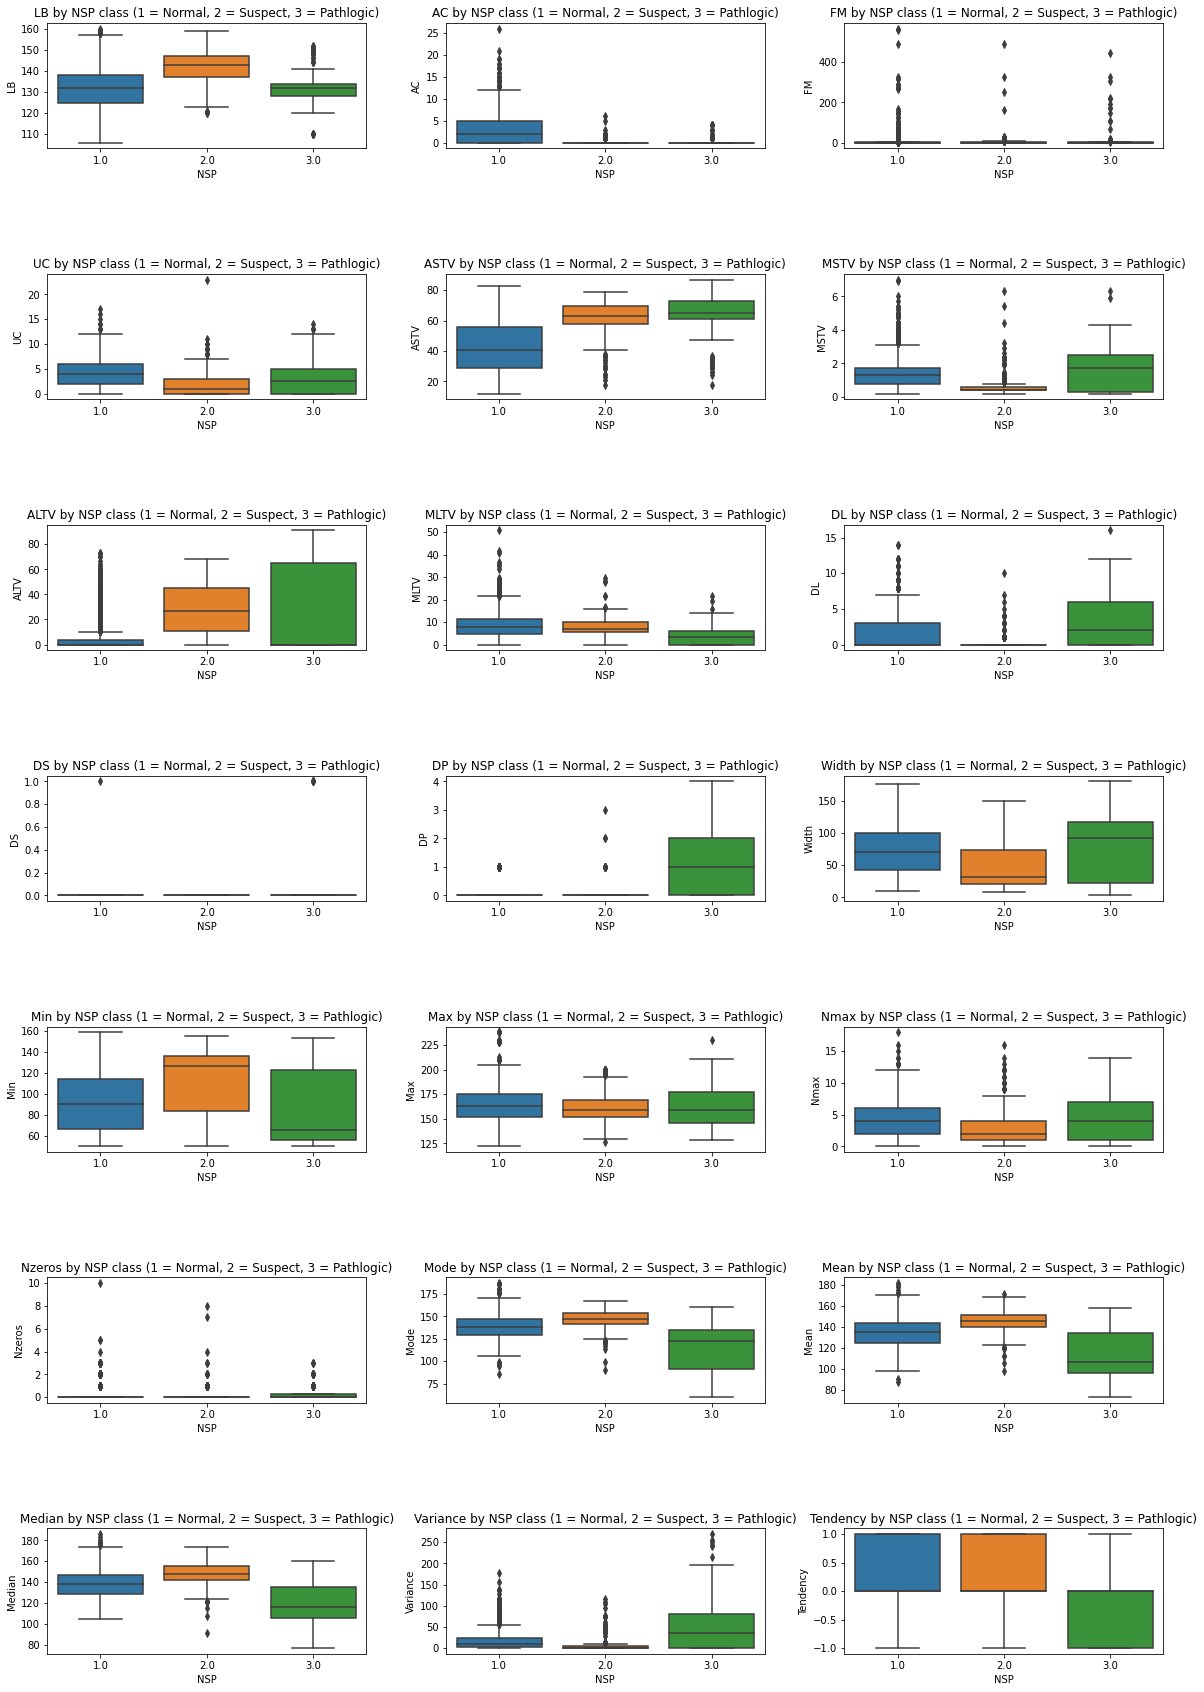

In [334]:
def boxplots(df, feat, target, ncol=3, figsize=(20,30)):
    
    inputs = list(df.columns)

    num_inputs = len(inputs)
    
    fig, axs = plt.subplots(num_inputs//ncol, ncol, figsize=figsize)
    
    for i, (ax, curve) in enumerate(zip(axs.flat, feat)):
        sns.boxplot(y=df[curve], x= target, ax=ax)

        ax.set_title(inputs[i]+' by NSP class (1 = Normal, 2 = Suspect, 3 = Pathlogic)')
        ax.set_xlabel('NSP')
        ax.set_ylabel(inputs[i])

    plt.subplots_adjust(hspace=1.00, wspace=0.25)
    plt.show()
    
boxplots(file,file.iloc[0:19],file['NSP'],ncol=3)

Now we need to look at correlations between each of the features, seperated by NSP class

In [335]:
q = file.loc[:, file.columns != 'CLASS']
q.head()

LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...   Min    Max  \
0  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  62.0  126.0   
1  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  68.0  198.0   
2  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  68.0  198.0   
3  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  53.0  170.0   
4  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  53.0  170.0   

   Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  NSP  
0   2.0     0.0  120.0  137.0   121.0      73.0       1.0  2.0  
1   6.0     1.0  141.0  136.0   140.0      12.0       0.0  1.0  
2   5.0     1.0  141.0  135.0   138.0      13.0       0.0  1.0  
3  11.0     0.0  137.0  134.0   137.0      13.0       1.0  1.0  
4   9.0     0.0  137.0  136.0   138.0      11.0       1.0  1.0  

[5 rows x 22 columns]

Ensure NSP is a categorical target variable

In [336]:
q['NSP'] = q['NSP'].astype('category')

<ipython-input-336-90eae0769aa6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q['NSP'] = q['NSP'].astype('category')


In [337]:
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2126 non-null   float64 
 1   AC        2126 non-null   float64 
 2   FM        2126 non-null   float64 
 3   UC        2126 non-null   float64 
 4   ASTV      2126 non-null   float64 
 5   MSTV      2126 non-null   float64 
 6   ALTV      2126 non-null   float64 
 7   MLTV      2126 non-null   float64 
 8   DL        2126 non-null   float64 
 9   DS        2126 non-null   float64 
 10  DP        2126 non-null   float64 
 11  Width     2126 non-null   float64 
 12  Min       2126 non-null   float64 
 13  Max       2126 non-null   float64 
 14  Nmax      2126 non-null   float64 
 15  Nzeros    2126 non-null   float64 
 16  Mode      2126 non-null   float64 
 17  Mean      2126 non-null   float64 
 18  Median    2126 non-null   float64 
 19  Variance  2126 non-null   float64 
 20  Tendency

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


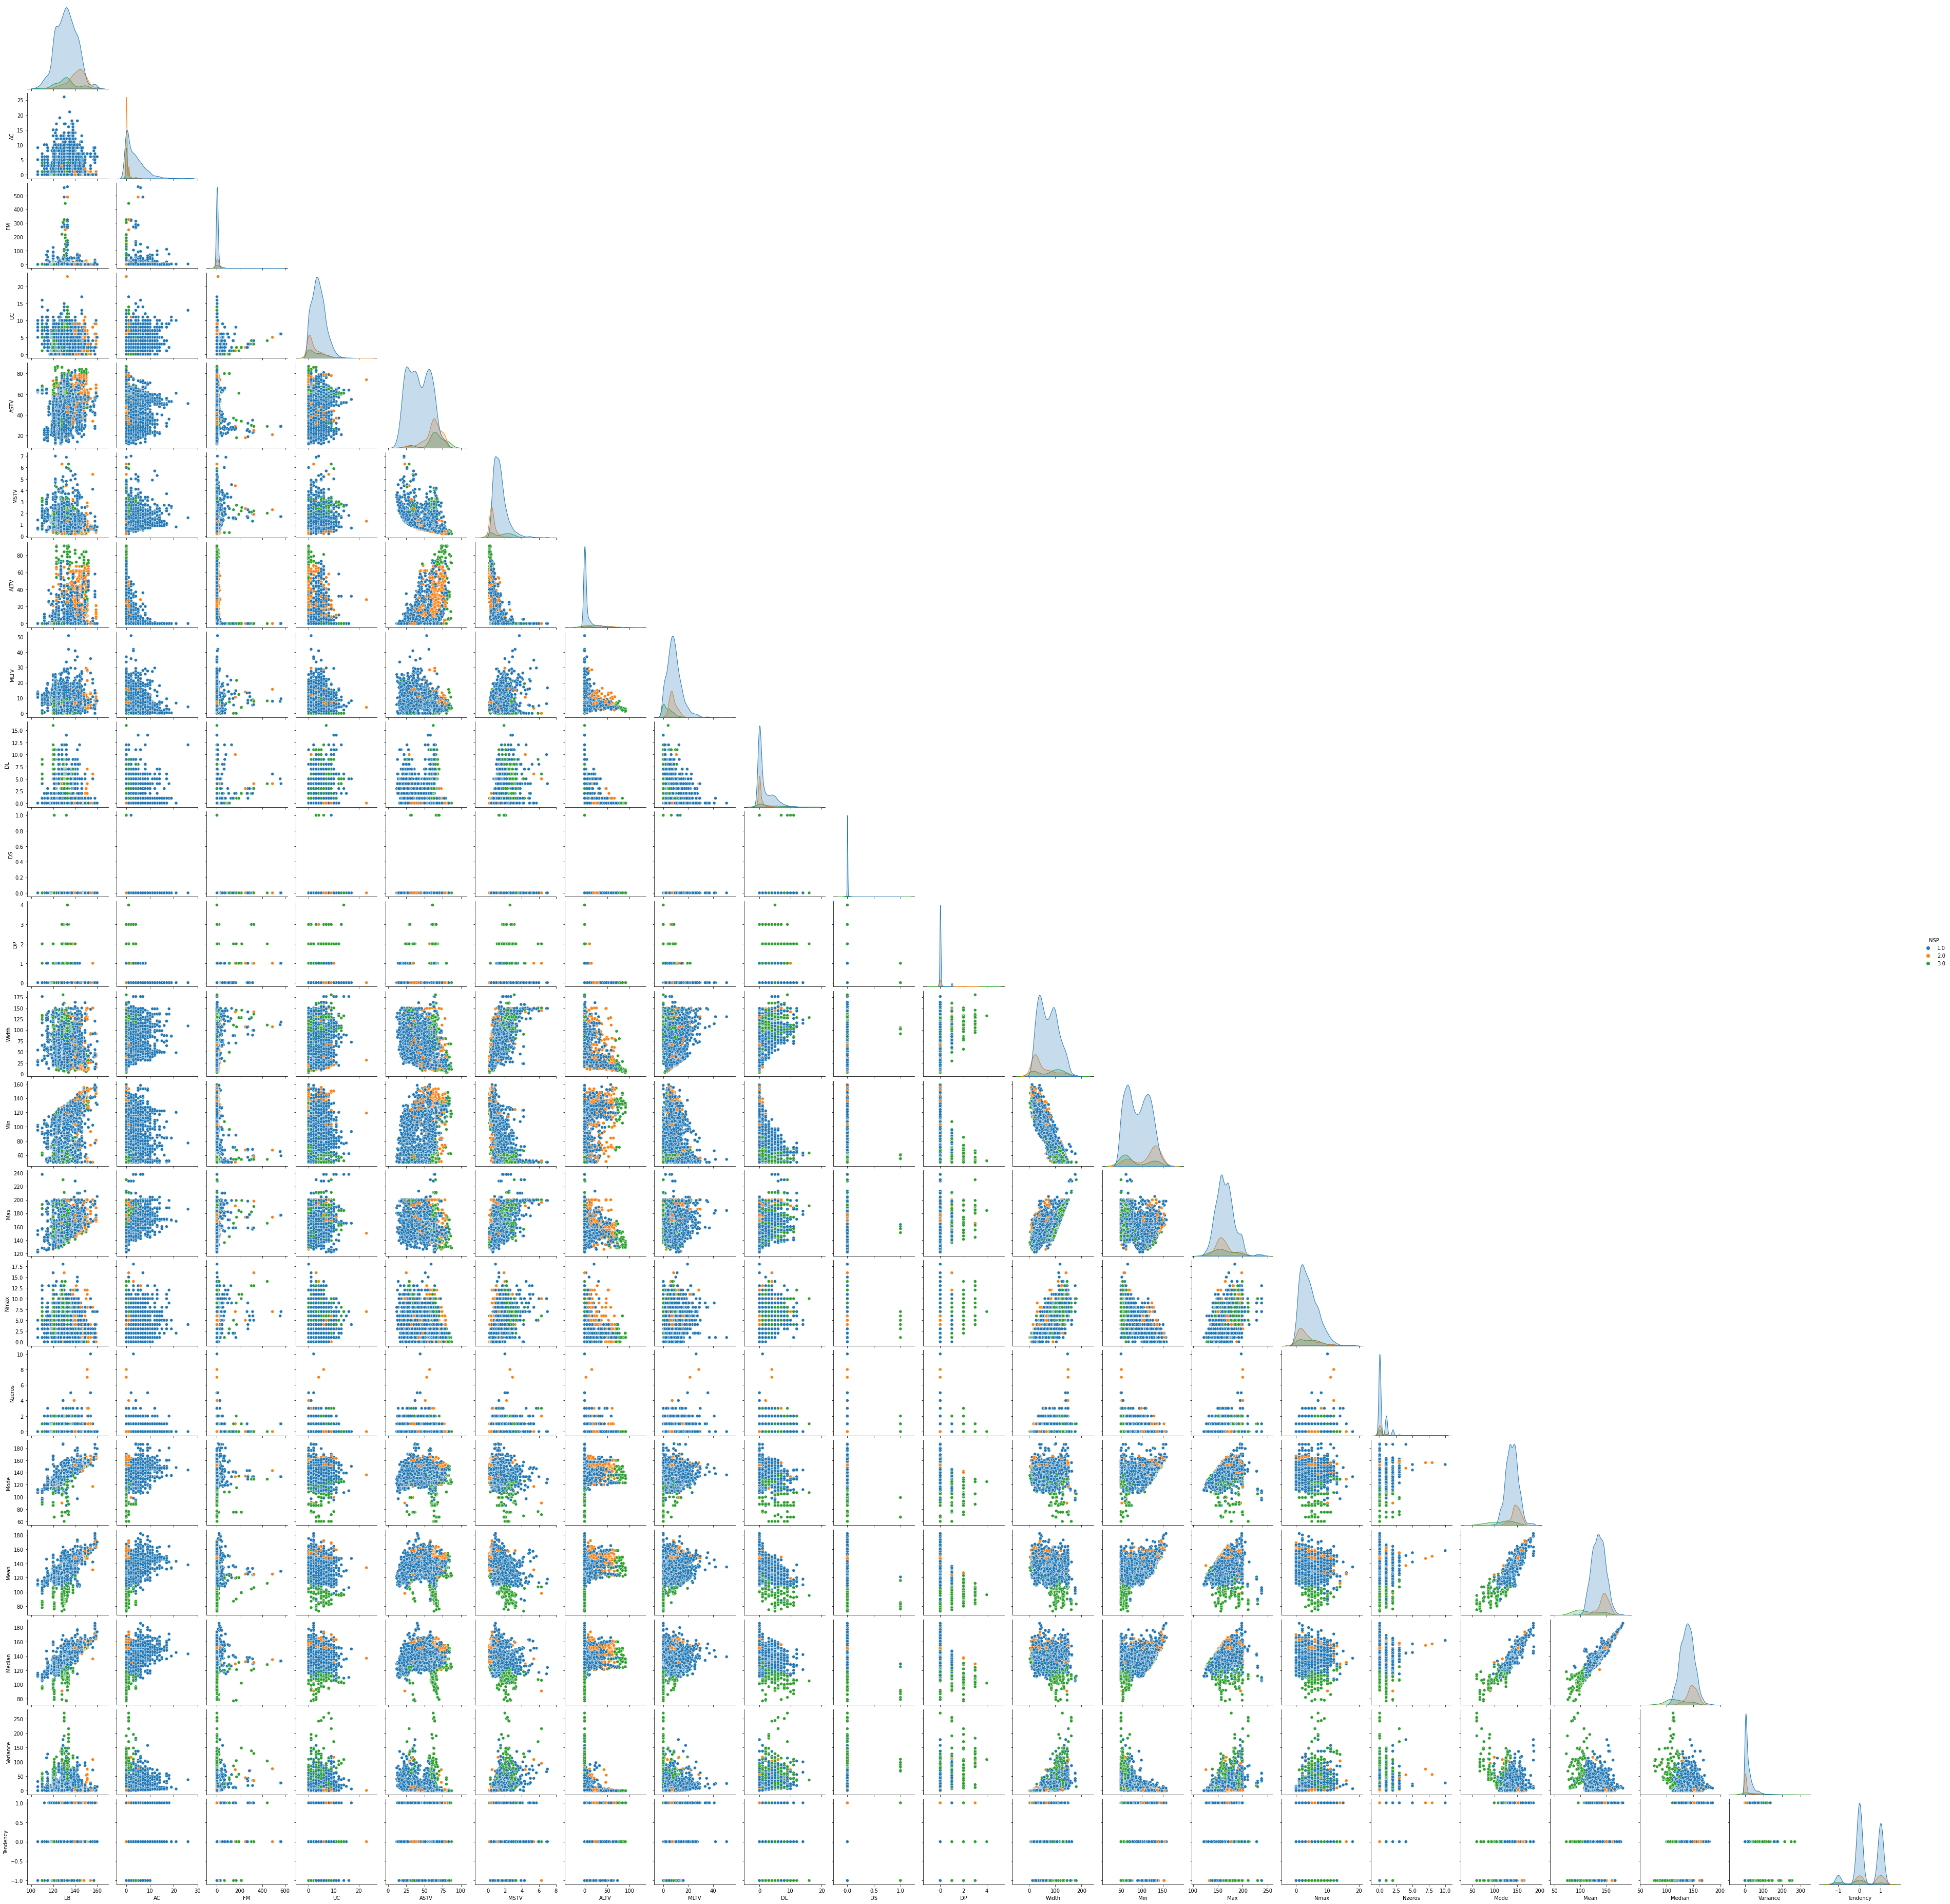

In [338]:

sns.pairplot(q, hue="NSP" , corner=True)
plt.show()



One aspect of the boxplots and the pairplots that stands out is the fact that fetal heart rhythm has lower mean/median/mode in NSP class P compared to NSP classes N and S.



Now we can inspect the features which have a strong correlation with an NSP class. We will compare this against the high/mid/low cross-correlations to determine which features correlate with an NSP class, independently of other features

In [339]:
mtc_sort_corr

var_1     var_2  correlation  abs_corr corr_level
629    Median      Mean     0.948251  0.948251       HIGH
562      Mode    Median     0.933399  0.933399       HIGH
419       Min     Width    -0.898519  0.898519       HIGH
561      Mode      Mean     0.893412  0.893412       HIGH
18         LB    Median     0.789246  0.789246       HIGH
..        ...       ...          ...       ...        ...
156      ASTV  Tendency    -0.005748  0.005748        LOW
510    Nzeros        LB    -0.004745  0.004745        LOW
449       Max      MLTV     0.002023  0.002023        LOW
688  Tendency        DL    -0.000687  0.000687        LOW
682  Tendency        FM    -0.000069  0.000069        LOW

[210 rows x 5 columns]

##### 2.8 Visualizing the correlations between features that correlate strongly with target NSP class<a id='2.8'></a>

In [340]:

N_corr = ['DP', 'Variance', 'ASTV','Mode', 'Mean', 'Median', 'AC', 'Tendency']
S_corr = ['ASTV', 'ALTV', 'LB', 'AC', 'UC', 'MSTV', 'DL', 'Width', 'Variance']
P_corr = ['AC', 'UC', 'Width', 'ALTV', 'ASTV', 'LB', 'DP', 'Min']
NSP_corr_group = [N_corr,S_corr,P_corr]

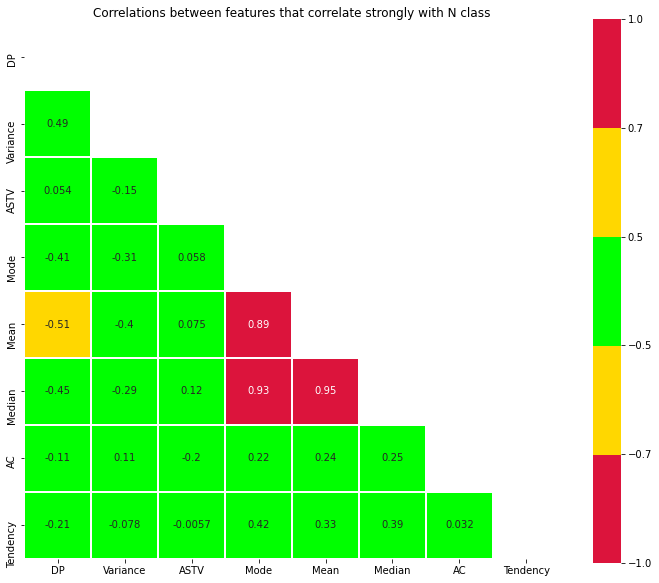

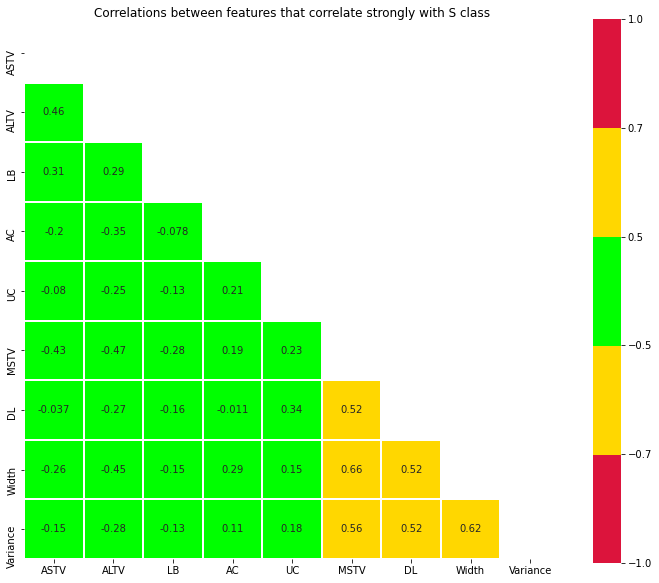

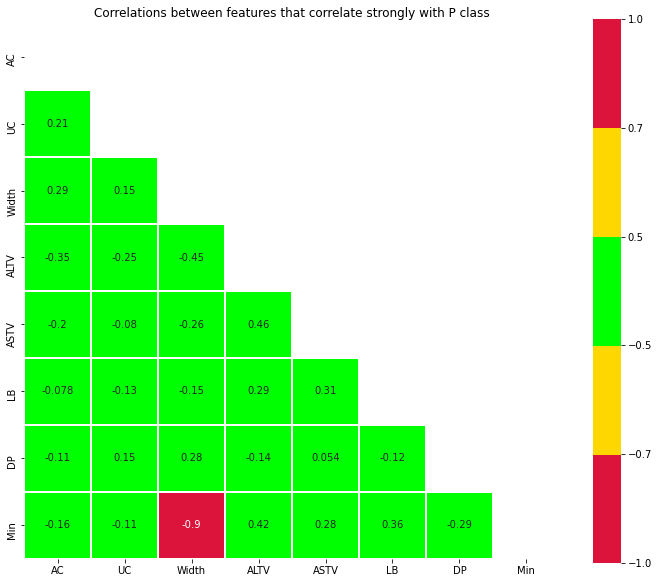

In [341]:
from matplotlib.colors import BoundaryNorm, ListedColormap

c = ['crimson', 'gold', 'lime', 'gold', 'crimson']
my_cmap = ListedColormap(c)
bounds = [-1.0,-0.7,-0.5,0.5,0.7,1.0]
my_norm = BoundaryNorm(bounds, ncolors=len(c))
maskN = np.triu(np.ones_like(q[N_corr].corr(), dtype=bool))
maskS = np.triu(np.ones_like(q[S_corr].corr(), dtype=bool))
maskP = np.triu(np.ones_like(q[P_corr].corr(), dtype=bool))

plt.subplots(figsize=(12,10))
sns.heatmap(q[N_corr].corr(),mask=maskN,cmap=my_cmap,norm=my_norm,annot=True,linewidth=1, linecolor='w', square=True)
plt.title('Correlations between features that correlate strongly with N class')

plt.subplots(figsize=(12,10))
sns.heatmap(q[S_corr].corr(), mask=maskS,cmap=my_cmap,norm=my_norm,annot=True,linewidth=1, linecolor='w', square=True)
plt.title('Correlations between features that correlate strongly with S class')

plt.subplots(figsize=(12,10))
sns.heatmap(q[P_corr].corr(),mask=maskP,cmap=my_cmap,norm=my_norm,annot=True,linewidth=1, linecolor='w', square=True)

plt.title('Correlations between features that correlate strongly with P class')
plt.show()

##### 3.1 Export files<a id='3.1'></a>

In [342]:
datapath = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea'
save_file(q, 'ctg_final.csv', datapath)
corr_datapath = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea'
save_file(mtc_sort_corr, 'ctg_corr.csv', corr_datapath)
corr_datapath2 = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea'
save_file(mtc_sort_corr2, 'ctg_corr_NSP.csv', corr_datapath2)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\ctg_final.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\ctg_corr.csv"
Writing file.  "C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\ctg_corr_NSP.csv"


##### 4.1 Summary<a id='4.1'></a>

Our data is ready for model construction.
We visualized the relationships between the many variables and our NSP target classifications, N/S/P.
Judging by our preliminary look into the data, it appears that there are definitive statistical feature disparities between classifications. The more important-seeming features are:

DP, Variance, ASTV, Mean, Median, Mode, AC, Tendency, UC, ALTV, Width, LB, and Min.

We are prepared to commense logistic regression classification modeling in the next notebook.